# Loan Application Status Prediction

Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# to import dataset
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
 #to check column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#info about the data shape of data,type of individual columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataframe have 13 columns and 614 rows. 8 columns have object, 1 int64 and 4 float data type. Null values are also present in the dataset.

In [6]:
# to check null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

6 columns have no null values . Credit_History has maximum null values and Married has minimum null values.

In [8]:
#Replacing NaN values in numerical columns(using median )
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [9]:
#Replacing null values in categorical columns(using mode )
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [10]:
#to check null values after replacing with median and mode
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the null values have been removed.



In [11]:
# to Check unique values in the target column
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [12]:
#to get statistical summary of the column
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [13]:
# to check for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [14]:
# to check for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


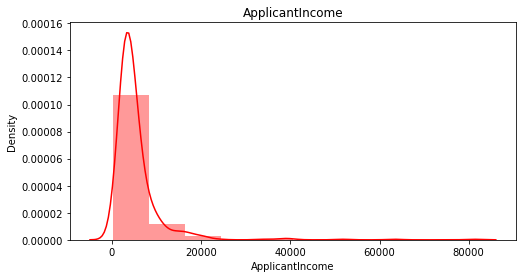

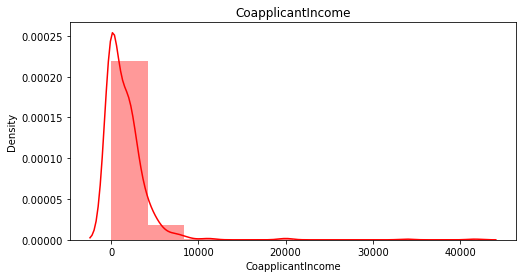

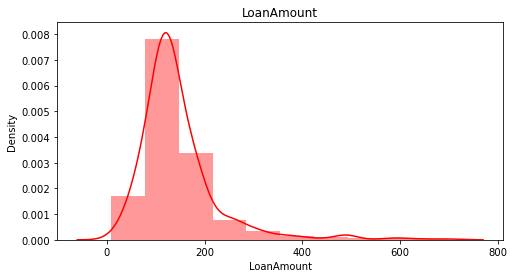

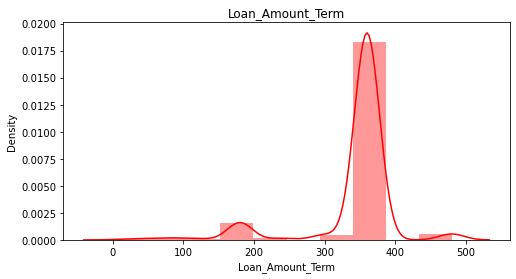

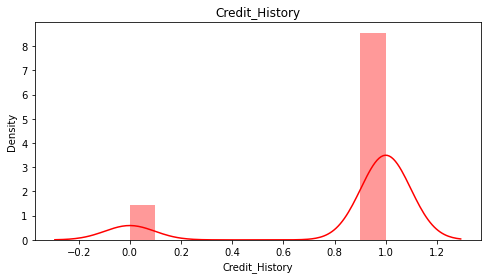

In [15]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="r")
    plt.title(i)
    plt.show()

All columns are skewed.

Most of the applicant income is between 0 to 10000.Very few applicants have salary between 20000 to 80000.Data is right skewed.

Most of the coapplicant income is inbetween 0 to 5000.Very few coapplicants have income between 10000 to 40000. Data is right skewed.

Most of the loan amount is between 100 to 200.The data is right skewed.

Most of the Loan amount term is around 360. Data is left skewed.

Most of the customers have good credit history.

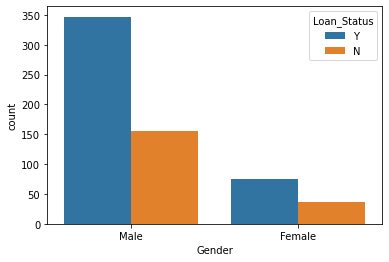

In [16]:
sns.countplot(x='Gender',hue ='Loan_Status',data = df)
plt.show()

Males get far more loan approval than females.



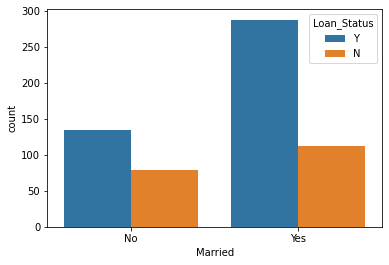

In [17]:
 sns.countplot(x='Married',hue ='Loan_Status',data = df)
plt.show()

Married people get more loan approvals than unmarried people.



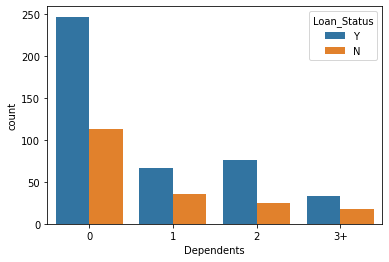

In [18]:
sns.countplot(x='Dependents',hue ='Loan_Status',data = df)
plt.show()

People with no dependents get more loan approvals, where as people with more than 3 dependents get very less loan approvals.



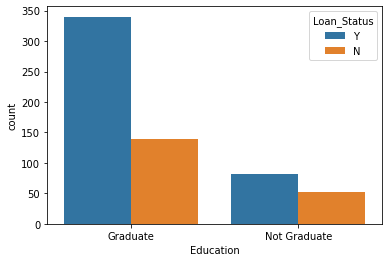

In [19]:
sns.countplot(x='Education',hue ='Loan_Status',data = df)
plt.show()

People with graduation degree gets more loan approvals than non graduates.



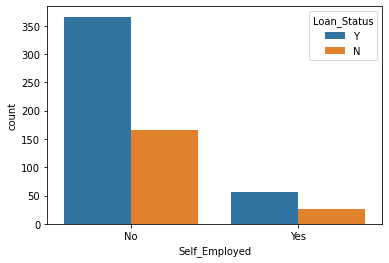

In [20]:
sns.countplot(x='Self_Employed',hue ='Loan_Status',data = df)
plt.show()

Self employed people get very less loan approvals.

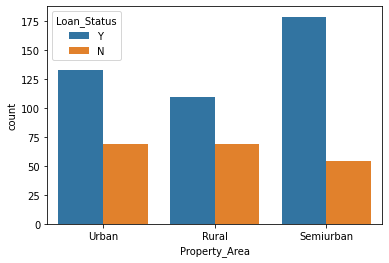

In [21]:
sns.countplot(x='Property_Area',hue ='Loan_Status',data = df)
plt.show()

people living Semiurban area get more loan approvals than people living in urban and rural areas.


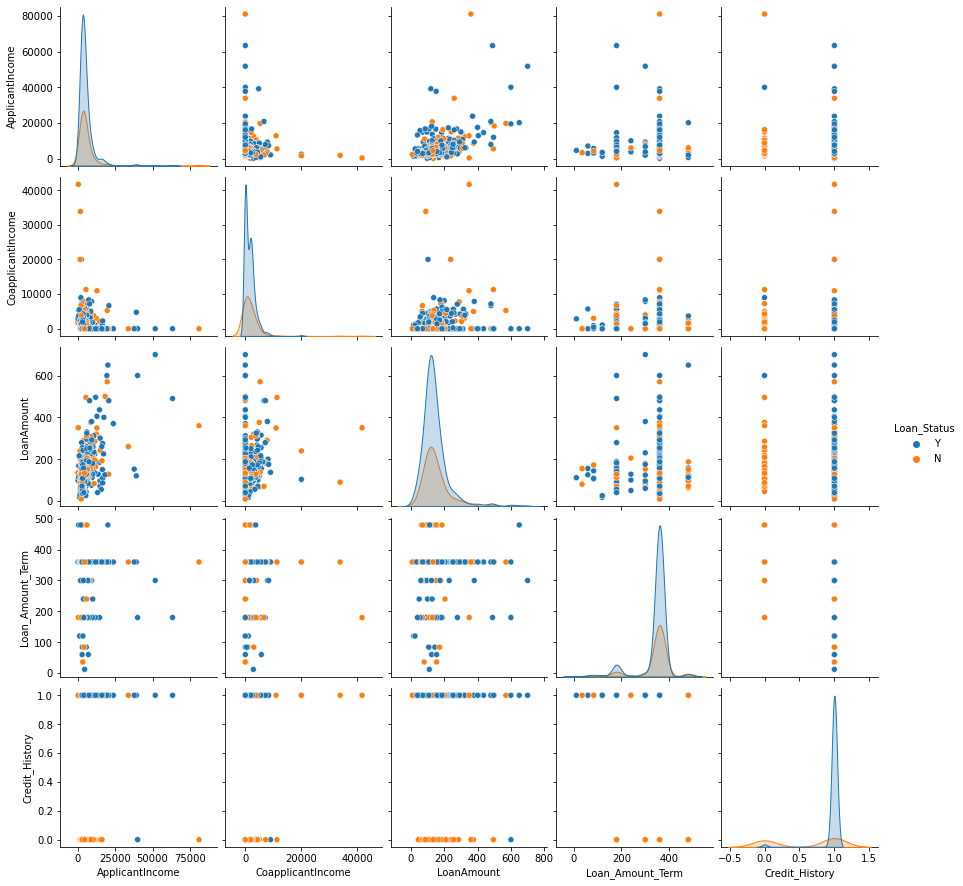

In [22]:
#pair ploting for df
sns.pairplot(df,hue="Loan_Status")

In the above pair plot, Laon_Status is taken as hue as it is our target variable.There are some extreme outliers present in the dataset.

Density of data points are high in the range of 0-2000 for ApplicantIncome, and 0-300 for loan amount which means if Applicants income is in the range of 0-2000 then the loan amount will be approved in the range 0-300.

If the applicant has credit history 1 then his/her chances of getting loan approved is more irrespective of Applicant Income.

<AxesSubplot:>

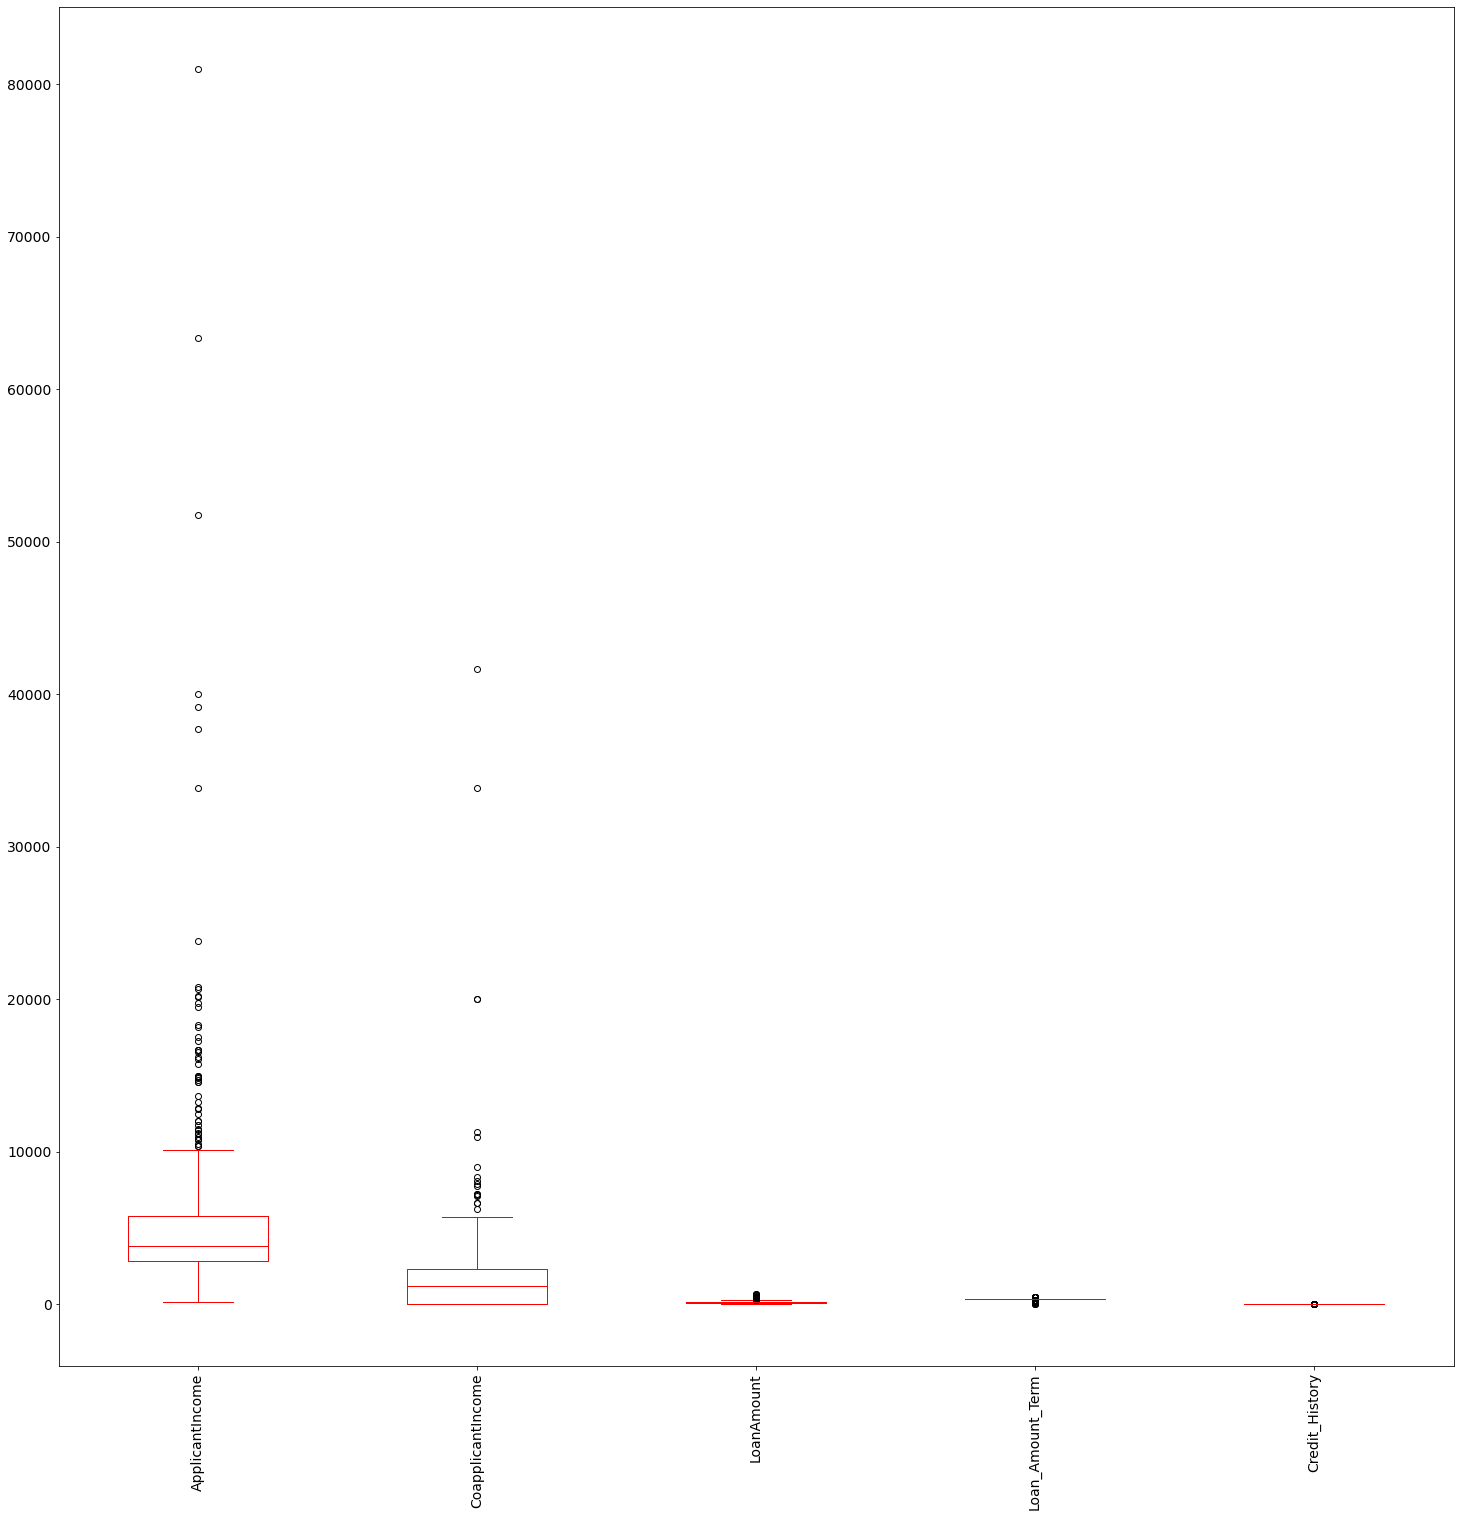

In [23]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

As Credit_History,Loan_Amount_Term is a Categorical column we are not required to remove outliers.In all other 4 numerical columns we have to remove outliers.

In [24]:
#Features having outliers
features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [25]:
# removing outliers using zscore method
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [26]:
#Checking shape of new dataset
df_new.shape

(577, 13)

In [27]:
#Checking dataloss in IQR
Dataloss = (((614-434)/614)*100)
Dataloss

29.31596091205212

In [28]:
#Checking for skewness
df_new.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

In [29]:
#Creating a list of skewed features
fea=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

In [30]:
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [32]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [33]:
#Checking skewness again
df_new[fea].skew()

ApplicantIncome     -0.246179
CoapplicantIncome   -0.150023
LoanAmount          -0.046722
dtype: float64

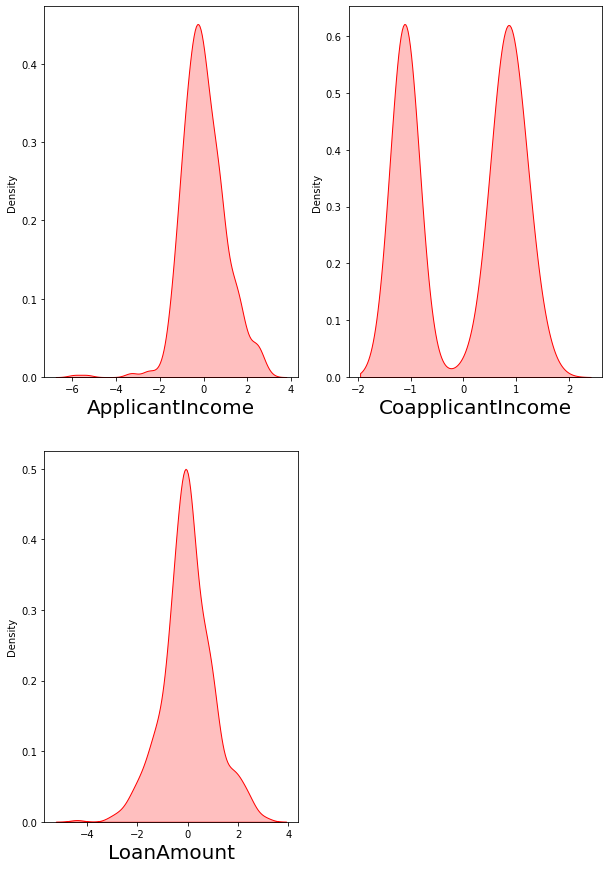

In [35]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in df_new[fea]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df_new[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

skewness of all numerical data have been removed


Label Encoding:

In [36]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [37]:
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [38]:
df_new[cat_col].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,0,0,0,2,1
1,1,1,1,1,0,0,0,0
2,2,1,1,0,0,1,2,1
3,3,1,1,0,1,0,2,1
4,4,1,0,0,0,0,2,1


Using label encoder to encode the categorical columns.

Checking correlation using heat map:

In [39]:
cor=df_new.corr()
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.011887,-0.013677,0.059780,0.053923,0.037935,0.022540,-0.037209,-0.000416,-0.023393,-0.043065,-0.164261,0.023708
Gender,-0.011887,1.000000,0.378997,0.188162,0.045696,-0.006207,0.060636,0.233491,0.172828,-0.104983,0.013172,-0.026340,0.017408
Married,-0.013677,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.026650,0.330783,0.182897,-0.127348,0.019308,0.010595,0.089026
Dependents,0.059780,0.188162,0.329900,1.000000,0.069814,0.044543,0.107059,-0.000019,0.131195,-0.087389,-0.020288,0.002327,0.017872
Education,0.053923,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.174333,0.043141,-0.126560,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,0.037935,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.205735,-0.084446,0.116611,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.022540,0.060636,-0.026650,0.107059,-0.174333,0.205735,1.000000,-0.355630,0.424387,-0.070423,0.027369,-0.011176,-0.001801
CoapplicantIncome,-0.037209,0.233491,0.330783,-0.000019,0.043141,-0.084446,-0.355630,1.000000,0.212804,-0.003648,0.004703,-0.077148,0.076618
LoanAmount,-0.000416,0.172828,0.182897,0.131195,-0.126560,0.116611,0.424387,0.212804,1.000000,0.049798,-0.004831,-0.099574,-0.023034
Loan_Amount_Term,-0.023393,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.070423,-0.003648,0.049798,1.000000,0.027392,-0.057004,-0.020291


Above are the correlations of all the pair of features. In the dataset no attribute is highly correlated to other attribute.



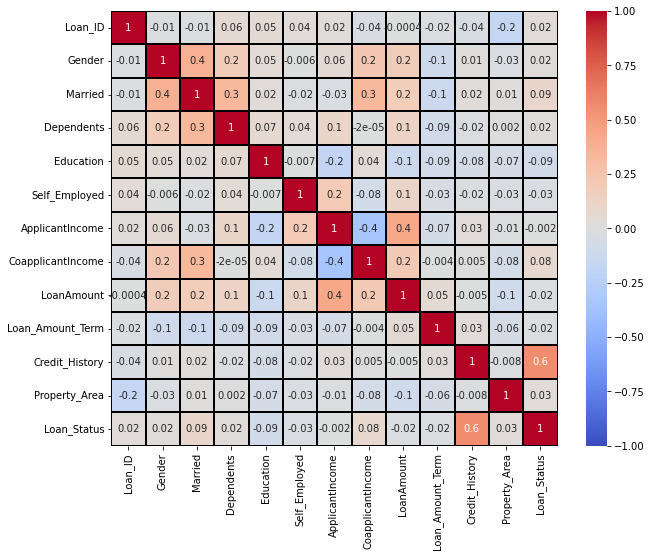

In [40]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

There is no multicolinearity issue in this dataset.

Target column(Loan status) have very less corrlation with ApplicantIncome and CoapplicantIncome.

Target column(Loan status) has maximum correlation with Credit history.

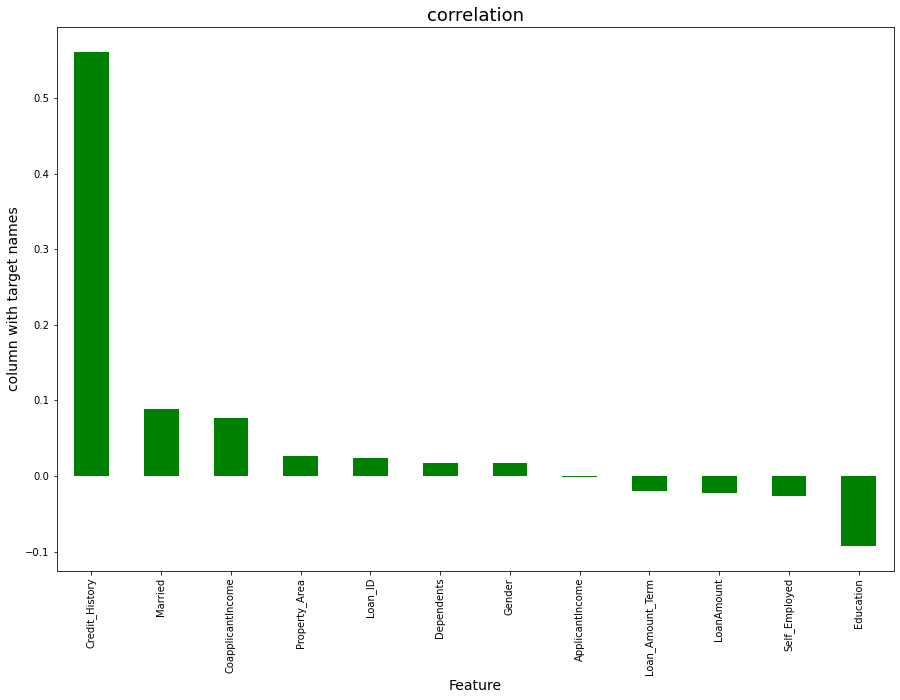

In [41]:
plt.figure(figsize=(15,10))
df_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

CoapplicanIncome and ApplicantIncome is very less correlated with target column.



In [42]:
#Droping less correlated column
df_new = df_new.drop(["CoapplicantIncome"],axis=1)

In [43]:
#seperate feature variable and target variable
x = df_new.drop("Loan_Status",axis=1)
y = df_new["Loan_Status"]

In [44]:
# to scale data using standard scaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [45]:
X.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.729052,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.693376,0.013122,0.230853,0.418513,1.227472
1,-1.723048,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.258101,0.013122,0.230853,0.418513,-1.306522
2,-1.717044,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.511665,-1.452223,0.230853,0.418513,1.227472
3,-1.711041,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.786776,-0.141640,0.230853,0.418513,1.227472
4,-1.705037,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.738669,0.249719,0.230853,0.418513,1.227472


Balancing the target variable using oversampling:

In [46]:
#Checking the value count of target column
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [47]:
# using smote to balance target variable
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [48]:
# Checking the value counts again
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

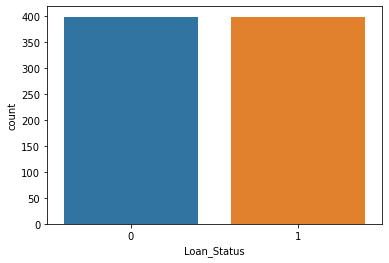

In [49]:
# Visualizing the data after oversampling
sns.countplot(y)

Finding Best Random State and Accuracy:



In [50]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8870292887029289  on Random_state  86


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)


i) DecisionTreeClassifier:



In [52]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.7322175732217573
Confusion Matrix: [[76 27]
 [37 99]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       103
           1       0.79      0.73      0.76       136

    accuracy                           0.73       239
   macro avg       0.73      0.73      0.73       239
weighted avg       0.74      0.73      0.73       239



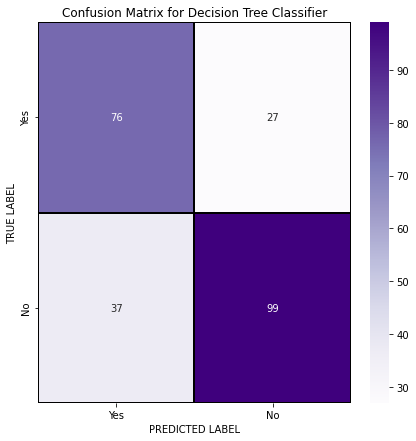

In [53]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

ii) RandomForestClassifier:



In [54]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8744769874476988
Confusion Matrix: [[ 87  16]
 [ 14 122]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       103
           1       0.88      0.90      0.89       136

    accuracy                           0.87       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.87      0.87      0.87       239



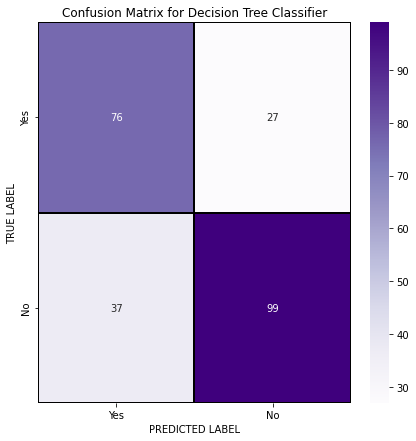

In [55]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

iii) SupportVectorClassifier:



In [56]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.803347280334728
Confusion Matrix: [[ 69  34]
 [ 13 123]]
              precision    recall  f1-score   support

           0       0.84      0.67      0.75       103
           1       0.78      0.90      0.84       136

    accuracy                           0.80       239
   macro avg       0.81      0.79      0.79       239
weighted avg       0.81      0.80      0.80       239



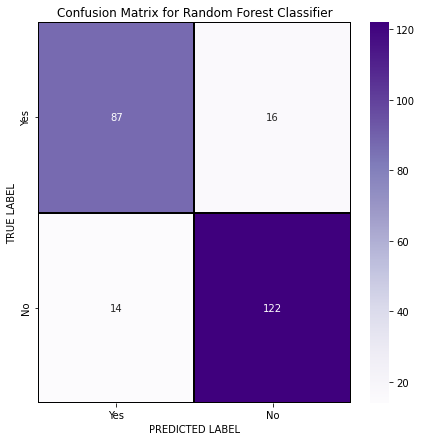

In [57]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

iv) K-Neighbor Classifier:


In [59]:
knn=KNN()
knn.fit(X_train,y_train)
predkn=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.7866108786610879
Confusion Matrix: [[ 84  19]
 [ 32 104]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       103
           1       0.85      0.76      0.80       136

    accuracy                           0.79       239
   macro avg       0.78      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



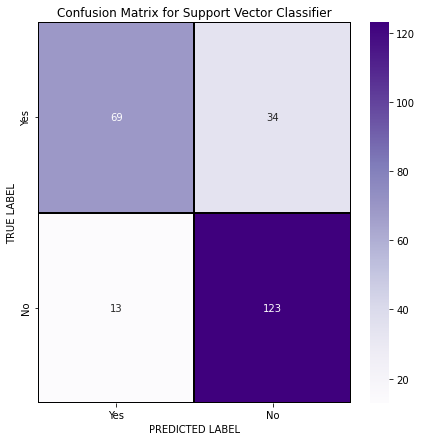

In [60]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

Cross Validation Score:

In [62]:
#Importing library
from sklearn.model_selection import cross_val_score

In [63]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X,y,cv=5).mean())

0.44100628930817604


In [64]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.4850707547169811


In [65]:
# cv score for Support Vector Classifier
print(cross_val_score(SV,X,y,cv=5).mean())

0.6771776729559748


In [66]:
# cv score for KNN Classifier
print(cross_val_score(knn,X,y,cv=5).mean())

0.6997562893081761


Above are the cross validation scores of DTC,RFC,SVC,and KNN.

The difference of model accuracy and cross validation score - RFC is my best model.

Hyper Parameter tuning:

In [67]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [68]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [69]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [70]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [71]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 200}

In [72]:
Final_mod=RandomForestClassifier(criterion='entropy',max_depth=20, max_features='auto', n_estimators=200)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

89.5397489539749


In [73]:
print('Accuracy Score:',accuracy_score(y_test,pred))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 0.895397489539749
Confusion matrix: [[ 88  15]
 [ 10 126]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       103
           1       0.89      0.93      0.91       136

    accuracy                           0.90       239
   macro avg       0.90      0.89      0.89       239
weighted avg       0.90      0.90      0.90       239



I got best model as RFC and i got the accuracy 89.53% after tunning which is good.!!!!


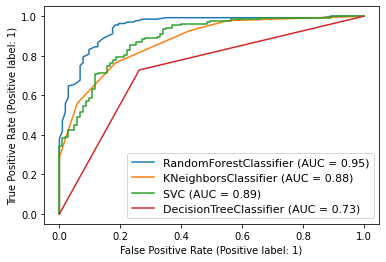

In [74]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(RFC,X_test,y_test)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(SV, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)


plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [75]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"Loan_Prediction.pkl")

['Loan_Prediction.pkl']

Predictions

In [78]:
# Loading the saved model
model=joblib.load("Loan_Prediction.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [79]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])


,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted,1,1,0,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,1
Actual,1,1,0,0,1,0,1,0,1,0,...,0,0,1,1,0,0,1,0,1,0
